# Ожидаемая продолжительность жизни
Нужно выявить факторы, в наибольшей степени влияющие на ожидаемую продолжительность жизни в РФ

![Ожидаемая продолжительность жизни при рождении](life_expectancy_CIA_factbook.png)<br>
Задача решалась в рамках хакатона - Лидеры цифровойтрансформации

### Подключение библиотек

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
data = pd.read_csv("https://video.ittensive.com/machine-learning/sc-tatar2020/rosstat/rosstat.csv",
                   na_values=["-", " - ","...","…"," -"])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  479 non-null    object 
 1   2000     350 non-null    float64
 2   2001     352 non-null    float64
 3   2002     362 non-null    float64
 4   2003     362 non-null    float64
 5   2004     384 non-null    float64
 6   2005     412 non-null    float64
 7   2006     413 non-null    float64
 8   2007     418 non-null    float64
 9   2008     414 non-null    float64
 10  2009     414 non-null    float64
 11  2010     434 non-null    float64
 12  2011     432 non-null    float64
 13  2012     439 non-null    float64
 14  2013     445 non-null    float64
 15  2014     451 non-null    float64
 16  2015     456 non-null    float64
 17  2016     456 non-null    float64
 18  2017     444 non-null    float64
 19  2018     436 non-null    float64
 20  2019     21 non-null     float64
dtypes: float64(20), 

In [4]:
data.head()

,feature,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года),56178.0,62575.0,68176.0,75824.0,81733.0,89769.000000,89732.000000,93338.000000,100729.000000,...,104469.000000,103545.000000,108073.000000,114717.000000,120565.000000,128199.0,130808.0,117616.0,117334.000000,NaN
1,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей),NaN,NaN,NaN,NaN,NaN,752.387761,911.175828,1214.257908,1494.829045,...,1795.978998,2374.320191,2615.157789,2668.600732,2871.388393,3123.0,3420.0,3826.4,4379.528606,NaN
2,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.900000,47.900000,49.600000,48.800000,NaN,74.6,75.1,72.754000,NaN
3,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,121.000000,125.000000,129.000000,127.000000,NaN,192.0,193.0,186.614368,NaN
4,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,324.000000,332.000000,330.400000,330.600000,NaN,332.5,332.6,337.440000,NaN


### Очистка данных
Линейно интерполируем пропуски, а затем запомним названия факторов - столбцов исходного набора данных - и транспонируем данные

In [5]:
features = data["feature"]
data.drop(labels=["feature"], inplace=True, axis=1)
data.interpolate(method="linear", axis=1, inplace=True)
data = data.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
data["feature"] = features
data.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,feature
0,56178.000000,62575.000000,68176.000000,75824.000000,81733.000000,89769.000000,89732.000000,93338.000000,100729.000000,103246.000000,...,103545.000000,108073.000000,114717.000000,120565.000000,128199.00,130808.0,117616.0,117334.000000,117334.000000,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года)
1,752.387761,752.387761,752.387761,752.387761,752.387761,752.387761,911.175828,1214.257908,1494.829045,1500.624925,...,2374.320191,2615.157789,2668.600732,2871.388393,3123.00,3420.0,3826.4,4379.528606,4379.528606,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей)
2,45.900000,45.900000,45.900000,45.900000,45.900000,45.900000,45.900000,45.900000,45.900000,45.900000,...,45.900000,47.900000,49.600000,48.800000,61.70,74.6,75.1,72.754000,72.754000,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий
3,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,125.000000,129.000000,127.000000,159.50,192.0,193.0,186.614368,186.614368,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения
4,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,332.000000,330.400000,330.600000,331.55,332.5,332.6,337.440000,337.440000,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей)
5,504.400000,504.400000,504.400000,504.400000,504.400000,504.400000,504.400000,504.400000,504.400000,504.400000,...,504.400000,622.900000,707.300000,729.400000,843.65,957.9,964.5,1275.057026,1275.057026,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий
6,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,...,47.360000,53.220000,59.080000,64.940000,70.80,70.8,70.8,70.800000,70.800000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг."
7,109.600000,109.600000,109.600000,109.600000,109.600000,109.600000,109.600000,109.600000,109.600000,109.600000,...,124.300000,139.000000,153.700000,168.400000,183.10,183.1,183.1,183.100000,183.100000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг."
8,299.500000,299.500000,299.500000,299.500000,299.500000,299.500000,299.500000,299.500000,299.500000,299.500000,...,299.620000,299.740000,299.860000,299.980000,300.10,300.1,300.1,300.100000,300.100000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников (без внешних совместителей) в 2010, 2015 гг."
9,435.100000,435.100000,435.100000,435.100000,435.100000,435.100000,435.100000,435.100000,435.100000,435.100000,...,574.660000,714.220000,853.780000,993.340000,1132.90,1132.9,1132.9,1132.900000,1132.900000,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий в 2010, 2015 гг."


In [6]:
features = np.array(data["feature"])
data = data.T[:len(data.columns)-1].astype("float")
data.drop(labels=["2019"], inplace=True)
data.columns = features
data.head(10)

,ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ (на конец года),ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов рублей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения,12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников (без внешних совместителей),12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий,"12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников (без внешних совместителей) в 2010, 2015 гг.","12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий в 2010, 2015 гг.",...,4.22. ЧИСЛО ФИЛИАЛОВ ОБРАЗОВАТЕЛЬНЫХ ОРГАНИЗАЦИЙ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года),"4.23. ЧИСЛЕННОСТЬ ПРОФЕССОРСКО-ПРЕПОДАВАТЕЛЬСКОГО ПЕРСОНАЛА , ОСУЩЕСТВЛЯЮЩЕГО ОБРАЗОВАТЕЛЬНУЮ ДЕЯТЕЛЬНОСТЬ ПО ПРОГРАММАМ ВЫСШЕГО ОБРАЗОВАНИЯ (на начало учебного года; человек)","4.24. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (на начало учебного года; тысяч человек)","4.25. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ на 10 000 человек населения (на начало учебного года; человек)","4.26. ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ (тысяч человек)","4.27. ВЫПУСК БАКАЛАВРОВ, СПЕЦИАЛИСТОВ, МАГИСТРОВ (тысяч человек)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.1. Число организаций (на конец года)","4.28. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ АСПИРАНТОВ 4.28.2. Численность аспирантов (на конец года; человек)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.1. Число организаций (на конец года)","4.29. ОРГАНИЗАЦИИ, ВЕДУЩИЕ ПОДГОТОВКУ ДОКТОРАНТОВ 4.29.2. Численность докторантов (на конец года; человек)"
2000,56178.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,70.0,10445.0,127.2,336.0,35.7,15.9,30.0,2743.0,8.0,76.0
2001,62575.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,70.0,10445.0,150.2,397.0,43.8,18.8,32.0,2960.0,9.0,76.0
2002,68176.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,70.0,10445.0,170.8,452.0,43.7,21.4,37.0,3174.0,10.0,81.0
2003,75824.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,70.0,10445.0,191.6,508.0,48.1,25.0,38.0,3386.0,9.0,93.0
2004,81733.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,70.0,10445.0,207.1,550.0,49.3,29.6,40.0,3401.0,9.0,87.0
2005,89769.0,752.387761,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,54.0,10445.0,222.1,590.0,51.0,32.7,40.0,3345.0,8.0,82.0
2006,89732.0,911.175828,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,53.0,10445.0,228.0,606.0,51.7,38.0,42.0,3440.0,8.0,91.0
2007,93338.0,1214.257908,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,54.0,10445.0,227.8,605.0,50.4,41.9,42.0,3581.0,8.0,97.0
2008,100729.0,1494.829045,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,53.0,10445.0,223.7,594.0,45.8,41.6,42.0,3812.0,9.0,98.0
2009,103246.0,1500.624925,45.9,121.0,324.0,504.4,41.5,109.6,299.5,435.1,...,53.0,10445.0,220.2,583.0,43.5,43.9,41.0,3946.0,10.0,106.0


In [7]:
print (features)

['ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ  (на конец года)'
 'ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.2. ОБОРОТ ОРГАНИЗАЦИЙ (миллиардов  рублей)'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.1. Число малых предприятий'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.2. Число малых предприятий на 10 000 человек населения'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.3. Среднесписочная численность работников  (без внешних совместителей)'
 '12.3. ИТОГИ ВЫБОРОЧНЫХ ОБСЛЕДОВАНИЙ 12.3.4. Оборот малых предприятий'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.1. Число малых предприятий в 2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.2. Число малых предприятий на 10 000 человек населения в 2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.3. Среднесписочная численность работников  (без внешних совместителей) в  2010, 2015 гг.'
 '12.4. ИТОГИ СПЛОШНЫХ НАБЛЮДЕНИЙ 12.4.4. Выручка от реализации товаров (работ, услуг) малых предприятий  в 2010, 201

### Визуализация данных

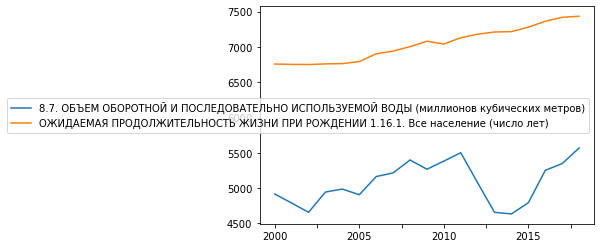

In [8]:
data["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"] *= 100
data[['8.7. ОБЪЕМ ОБОРОТНОЙ И ПОСЛЕДОВАТЕЛЬНО ИСПОЛЬЗУЕМОЙ ВОДЫ (миллионов кубических метров)',
     "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"]].plot.line()
plt.show()

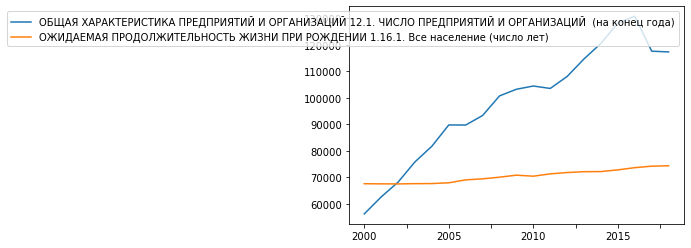

In [9]:
data["ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"] *= 10
data[['ОБЩАЯ ХАРАКТЕРИСТИКА ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ 12.1. ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ  (на конец года)',
     "ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ 1.16.1. Все население (число лет)"]].plot.line()
plt.show()